# EDA - merged features

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

# Get the path to the 'src' directory
src_path = os.path.abspath(os.path.join(os.getcwd(), '../src'))

# Add the 'src' folder to sys.path
if src_path not in sys.path:
  sys.path.append(src_path)

from helpers import *

pd.set_option('display.max_columns', None)

In [2]:
# import data

df = pd.read_csv('../data/merged_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,num_bureau_records,num_active_bureau_credits,num_closed_bureau_credits,num_bad_bureau_credits,num_sold_bureau_credits,most_recent_bureau_apply,max_days_bureau_overdue,avg_bureau_credit_enddate,max_bureau_overdue_amt,ttl_cnt_bureau_prolong,avg_ratio_bureau_cr_debt,ttl_bureau_cc_limit,ttl_bureau_credit_overdue,bureau_type_Auto,bureau_type_Business,bureau_type_Consumer,bureau_type_Real Estate,bureau_type_Other,ttl_bureau_active_annuity,avg_bb_status_sum,avg_bb_status_mean,cc_avg_credit_usage_ratio,avg_cc_ATM_ratio,avg_cc_cnt_ATM_drawings,cc_status_active_ttl,cc_status_completed_ttl,cc_status_negative_ttl,avg_cc_DPD,avg_cc_DPD_DEF,installment_avg_payment_ratio,install_avg_diff_due_paid,pos_avg_DPD,pos_avg_DPD_DEF,pos_status_active,pos_status_completed,pos_status_demand,pos_status_other,prev_avg_ratio_credit_approved,prev_reject_CLIENT,prev_reject_HC,prev_reject_LIMIT,prev_reject_SCO,prev_reject_SCOFR,prev_reject_SYSTEM,prev_reject_VERIF,prev_reject_XAP,prev_reject_XNA,prev_binary_rejected,prev_status_approved,prev_status_canceled,prev_status_refused,prev_status_unused,prev_yield_XNA,prev_yield_high,prev_yield_low_action,prev_yield_low_normal,prev_yield_middle,prev_insured,prev_contract_type_cash,prev_contract_type_consumer,prev_contract_type_revolving,prev_contract_type_XNA,prev_purpose_building,prev_purpose_business,prev_purpose_garage,prev_purpose_holiday_home,prev_purpose_buy_home,prev_purpose_new_car,prev_purpose_used_car,prev_purpose_car_repair,prev_purpose_education,prev_purpose_everyday,prev_purpose_furniture,prev_purpose_utilities,pre_purpose_hobby,prev_purpose_journey,prev_purpose_medicine,prev_purpose_borrow,prev_purpose_other,prev_purpose_other_loan,prev_purpose_electronic_equip,prev_purpose_refuse,prev_purpose_repairs,prev_purpose_urgent,prev_purpose_wedding,p

### NAME_CONTRACT_TYPE

In [3]:
# check values

df['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

- impute most frequent
- ohe

### CODE_GENDER

In [4]:
# check values

df['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

- impute most frequent
- ohe

### FLAG_OWN_CAR

In [5]:
# check values

df['FLAG_OWN_CAR'].value_counts()

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

- impute most frequent
- ohe

### FLAG_OWN_REALTY

In [6]:
# check values

df['FLAG_OWN_REALTY'].value_counts()

FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64

- impute most frequent
- ohe

### CNT_CHILDREN

In [7]:
# check values

df['CNT_CHILDREN'].value_counts()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64

In [8]:
df['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

- impute with 0
- log transform
- standardscaler

### AMT_INCOME_TOTAL

<Axes: >

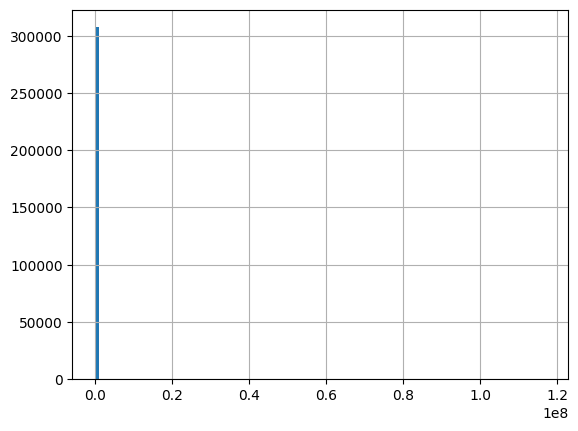

In [9]:
# check the distribution

df['AMT_INCOME_TOTAL'].hist(bins=100)

In [10]:
df['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

- impute median
- log transform
- standard scaler

### AMT_CREDIT

<Axes: >

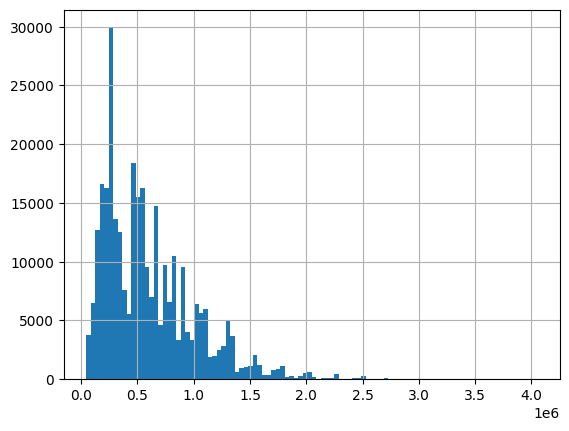

In [11]:
# check the distribution

df['AMT_CREDIT'].hist(bins=100)

In [16]:
check_outliers(df, 'AMT_CREDIT', iqr_multiplier=5)

The original dataframe contains 307511 observations.
Using IQR * 5, 14 outliers were detected.
If removed, 0.00% of the data will be dropped.


In [19]:
df['log_AMT_CREDIT'] = np.log1p(df['AMT_CREDIT'])

<Axes: >

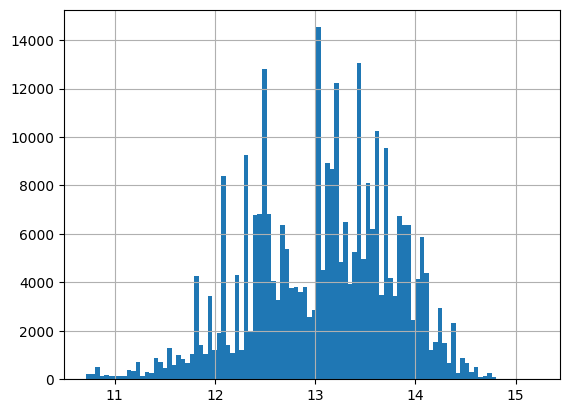

In [21]:
df['log_AMT_CREDIT'].hist(bins=100)

- impute median
- log transform
- standard scaler

### AMT_ANNUITY

<Axes: >

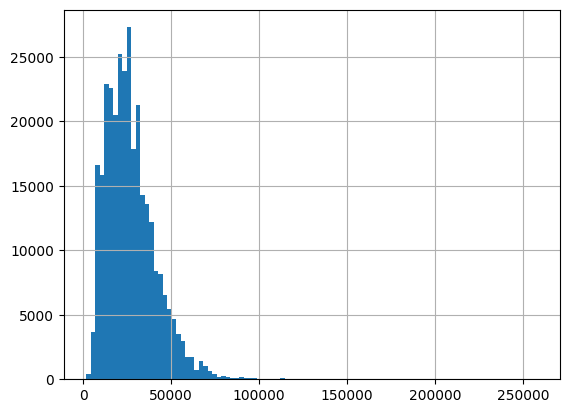

In [ ]:
# check the distribution

df['AMT_ANNUITY'].hist(bins=100)

In [ ]:
# check the nulls

df[df['AMT_ANNUITY'].isna()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,num_bureau_records,num_active_bureau_credits,num_closed_bureau_credits,num_bad_bureau_credits,num_sold_bureau_credits,most_recent_bureau_apply,max_days_bureau_overdue,avg_bureau_credit_enddate,max_bureau_overdue_amt,ttl_cnt_bureau_prolong,avg_ratio_bureau_cr_debt,ttl_bureau_cc_limit,ttl_bureau_credit_overdue,bureau_type_Auto,bureau_type_Business,bureau_type_Consumer,bureau_type_Real Estate,bureau_type_Other,ttl_bureau_active_annuity,avg_bb_status_sum,avg_bb_status_mean,cc_avg_credit_usage_ratio,avg_cc_ATM_ratio,avg_cc_cnt_ATM_drawings,cc_status_active_ttl,cc_status_completed_ttl,cc_status_negative_ttl,avg_cc_DPD,avg_cc_DPD_DEF,installment_avg_payment_ratio,install_avg_diff_due_paid,pos_avg_DPD,pos_avg_DPD_DEF,pos_status_active,pos_status_completed,pos_status_demand,pos_status_other,prev_avg_ratio_credit_approved,prev_reject_CLIENT,prev_reject_HC,prev_reject_LIMIT,prev_reject_SCO,prev_reject_SCOFR,prev_reject_SYSTEM,prev_reject_VERIF,prev_reject_XAP,prev_reject_XNA,prev_binary_rejected,prev_status_approved,prev_status_canceled,prev_status_refused,prev_status_unused,prev_yield_XNA,prev_yield_high,prev_yield_low_action,prev_yield_low_normal,prev_yield_middle,prev_insured,prev_contract_type_cash,prev_contract_type_consumer,prev_contract_type_revolving,prev_contract_type_XNA,prev_purpose_building,prev_purpose_business,prev_purpose_garage,prev_purpose_holiday_home,prev_purpose_buy_home,prev_purpose_new_car,prev_purpose_used_car,prev_purpose_car_repair,prev_purpose_education,prev_purpose_everyday,prev_purpose_furniture,prev_purpose_utilities,pre_purpose_hobby,prev_purpose_journey,prev_purpose_medicine,prev_purpose_borrow,prev_purpose_other,prev_purpose_other_loan,prev_purpose_electronic_equip,prev_purpose_refuse,prev_purpose_repairs,prev_purpose_urgent,prev_purpose_wedding,p

<Axes: >

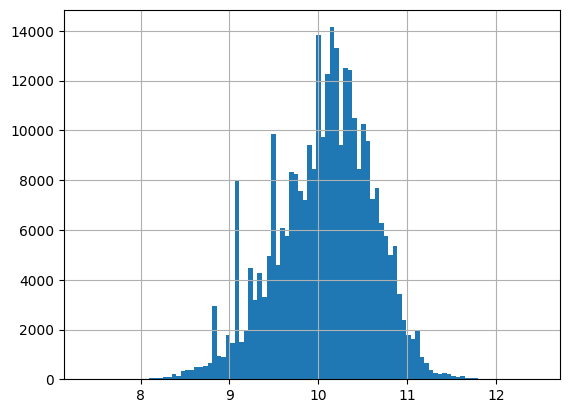

In [23]:
# check dist if use log transformation

df['log_AMT_ANNUITY'] = np.log1p(df['AMT_ANNUITY'])
df['log_AMT_ANNUITY'].hist(bins=100)

- impute median
- log transform
- standardscaler

### AMT_GOODS_PRICE

<Axes: >

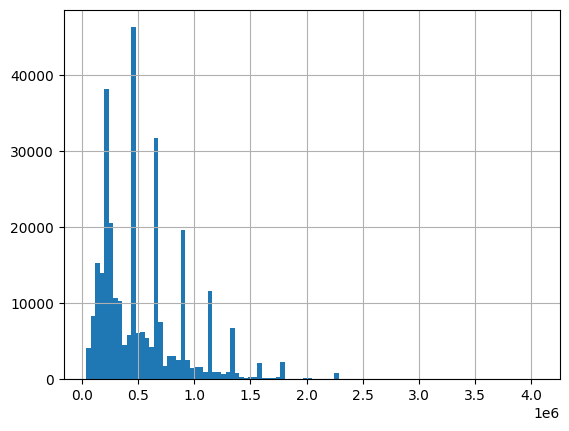

In [25]:
# check the distribution

df['AMT_GOODS_PRICE'].hist(bins=100)

<Axes: >

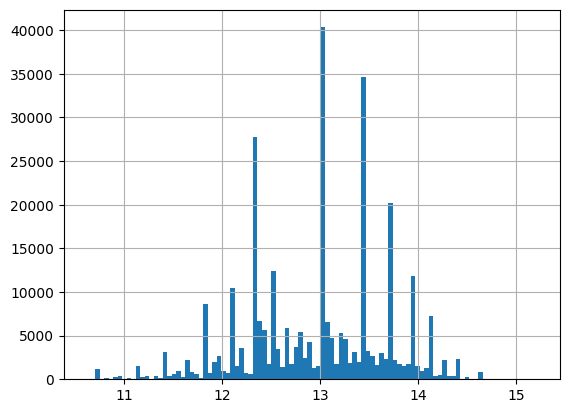

In [31]:
# check dist if use log transformation

df['log_AMT_GOODS_PRICE'] = np.log1p(df['AMT_GOODS_PRICE'])
df['log_AMT_GOODS_PRICE'].hist(bins=100)

- impute median
- log transform
- standard scaler

### NAME_TYPE_SUITE

In [32]:
# check values

df['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

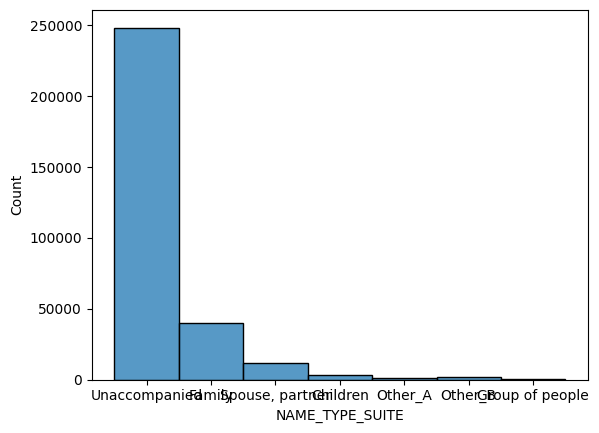

In [36]:
# compare the counts

sns.histplot(df['NAME_TYPE_SUITE']);


- impute most frequent
- ohe

### NAME_INCOME_TYPE

In [37]:
# check value counts

df['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

### NAME_EDUCATION_TYPE

In [38]:
# check value counts

df['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

- impute most frequent
- ohe

### NAME_FAMILY_STATUS

In [40]:
# check value counts

df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

- impute most frequent
- ohe

### NAME_HOUSING_TYPE

In [41]:
# check value counts

df['NAME_HOUSING_TYPE'].value_counts()

NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64

- impute most frequent
- ohe

### REGION_POPULATION_RELATIVE

In [45]:
# check value counts

df['REGION_POPULATION_RELATIVE'].describe()

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

<Axes: >

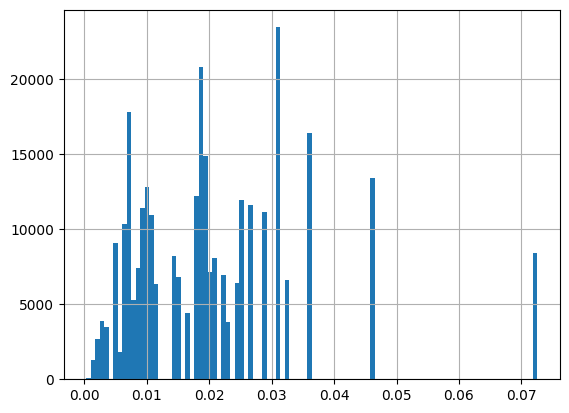

In [44]:
# check distribution

df['REGION_POPULATION_RELATIVE'].hist(bins=100)

- already normalized
- impute with median
- no scaling

### DAYS_BIRTH

Client's age in days at the time of application

<Axes: >

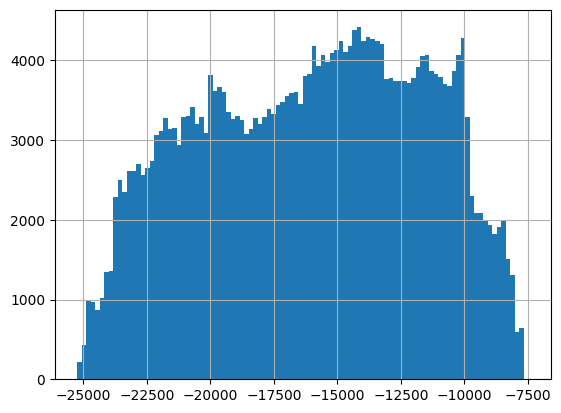

In [48]:
# check distribution

df['DAYS_BIRTH'].hist(bins=100)

- impute with median
- standardscaler

### DAYS_EMPLOYED

How many days before the application the person started current employment

<Axes: >

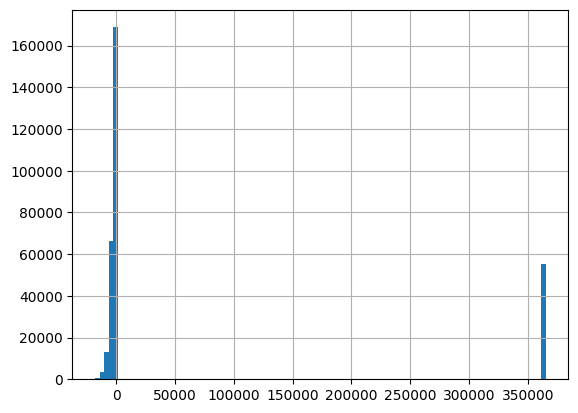

In [50]:
# check distribution

df['DAYS_EMPLOYED'].hist(bins=100)

In [52]:
# check the max & min

df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [53]:
# how many 0's

df[df['DAYS_EMPLOYED'] == 0]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,num_bureau_records,num_active_bureau_credits,num_closed_bureau_credits,num_bad_bureau_credits,num_sold_bureau_credits,most_recent_bureau_apply,max_days_bureau_overdue,avg_bureau_credit_enddate,max_bureau_overdue_amt,ttl_cnt_bureau_prolong,avg_ratio_bureau_cr_debt,ttl_bureau_cc_limit,ttl_bureau_credit_overdue,bureau_type_Auto,bureau_type_Business,bureau_type_Consumer,bureau_type_Real Estate,bureau_type_Other,ttl_bureau_active_annuity,avg_bb_status_sum,avg_bb_status_mean,cc_avg_credit_usage_ratio,avg_cc_ATM_ratio,avg_cc_cnt_ATM_drawings,cc_status_active_ttl,cc_status_completed_ttl,cc_status_negative_ttl,avg_cc_DPD,avg_cc_DPD_DEF,installment_avg_payment_ratio,install_avg_diff_due_paid,pos_avg_DPD,pos_avg_DPD_DEF,pos_status_active,pos_status_completed,pos_status_demand,pos_status_other,prev_avg_ratio_credit_approved,prev_reject_CLIENT,prev_reject_HC,prev_reject_LIMIT,prev_reject_SCO,prev_reject_SCOFR,prev_reject_SYSTEM,prev_reject_VERIF,prev_reject_XAP,prev_reject_XNA,prev_binary_rejected,prev_status_approved,prev_status_canceled,prev_status_refused,prev_status_unused,prev_yield_XNA,prev_yield_high,prev_yield_low_action,prev_yield_low_normal,prev_yield_middle,prev_insured,prev_contract_type_cash,prev_contract_type_consumer,prev_contract_type_revolving,prev_contract_type_XNA,prev_purpose_building,prev_purpose_business,prev_purpose_garage,prev_purpose_holiday_home,prev_purpose_buy_home,prev_purpose_new_car,prev_purpose_used_car,prev_purpose_car_repair,prev_purpose_education,prev_purpose_everyday,prev_purpose_furniture,prev_purpose_utilities,pre_purpose_hobby,prev_purpose_journey,prev_purpose_medicine,prev_purpose_borrow,prev_purpose_other,prev_purpose_other_loan,prev_purpose_electronic_equip,prev_purpose_refuse,prev_purpose_repairs,prev_purpose_urgent,prev_purpose_wedding,p

In [60]:
# check how many between 0 and max

df[(df['DAYS_EMPLOYED'] > 0) & (df['DAYS_EMPLOYED'] < 365243)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,num_bureau_records,num_active_bureau_credits,num_closed_bureau_credits,num_bad_bureau_credits,num_sold_bureau_credits,most_recent_bureau_apply,max_days_bureau_overdue,avg_bureau_credit_enddate,max_bureau_overdue_amt,ttl_cnt_bureau_prolong,avg_ratio_bureau_cr_debt,ttl_bureau_cc_limit,ttl_bureau_credit_overdue,bureau_type_Auto,bureau_type_Business,bureau_type_Consumer,bureau_type_Real Estate,bureau_type_Other,ttl_bureau_active_annuity,avg_bb_status_sum,avg_bb_status_mean,cc_avg_credit_usage_ratio,avg_cc_ATM_ratio,avg_cc_cnt_ATM_drawings,cc_status_active_ttl,cc_status_completed_ttl,cc_status_negative_ttl,avg_cc_DPD,avg_cc_DPD_DEF,installment_avg_payment_ratio,install_avg_diff_due_paid,pos_avg_DPD,pos_avg_DPD_DEF,pos_status_active,pos_status_completed,pos_status_demand,pos_status_other,prev_avg_ratio_credit_approved,prev_reject_CLIENT,prev_reject_HC,prev_reject_LIMIT,prev_reject_SCO,prev_reject_SCOFR,prev_reject_SYSTEM,prev_reject_VERIF,prev_reject_XAP,prev_reject_XNA,prev_binary_rejected,prev_status_approved,prev_status_canceled,prev_status_refused,prev_status_unused,prev_yield_XNA,prev_yield_high,prev_yield_low_action,prev_yield_low_normal,prev_yield_middle,prev_insured,prev_contract_type_cash,prev_contract_type_consumer,prev_contract_type_revolving,prev_contract_type_XNA,prev_purpose_building,prev_purpose_business,prev_purpose_garage,prev_purpose_holiday_home,prev_purpose_buy_home,prev_purpose_new_car,prev_purpose_used_car,prev_purpose_car_repair,prev_purpose_education,prev_purpose_everyday,prev_purpose_furniture,prev_purpose_utilities,pre_purpose_hobby,prev_purpose_journey,prev_purpose_medicine,prev_purpose_borrow,prev_purpose_other,prev_purpose_other_loan,prev_purpose_electronic_equip,prev_purpose_refuse,prev_purpose_repairs,prev_purpose_urgent,prev_purpose_wedding,p

- there are only 2 observations where DAYS_EMPLOYED is 0
- how are the unemployed being accounted for?
- 365243 is likely the placeholder for the unemployed

1. replace placeholder value 365243 with 1000
2. create a new feature that indicates whether or not the client has a job

### DAYS_REGISTRATION

How many days before the application did client change his registration

In [61]:
# check distribution

df['DAYS_REGISTRATION'].describe()

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

- impute with median
- standardscaler

### DAYS_ID_PUBLISH

<Axes: >

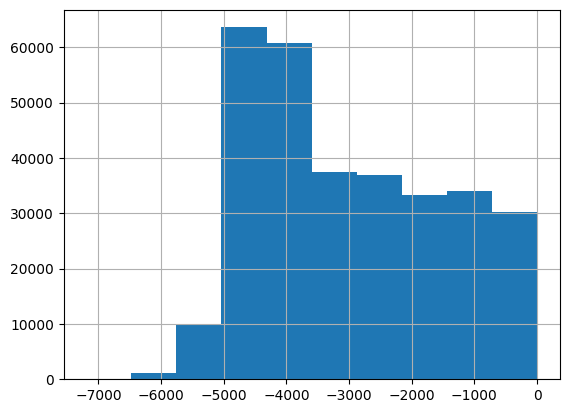

In [69]:
# check values

df['DAYS_ID_PUBLISH'].hist()

### OWN_CAR_AGE

Age of client's car

<Axes: >

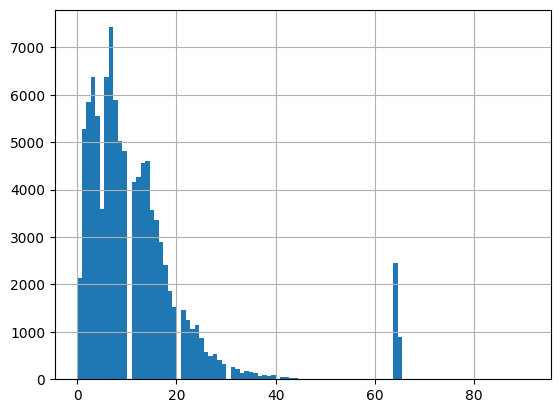

In [71]:
# check values

df['OWN_CAR_AGE'].hist(bins=100)

In [73]:
# check nulls

df['OWN_CAR_AGE'].isna().sum() / df['OWN_CAR_AGE'].shape

array([0.6599081])

- no many nulls, placeholder data, drop feature

### FLAG_MOBIL

In [75]:
# check values

df['FLAG_MOBIL'].value_counts()

FLAG_MOBIL
1    307510
0         1
Name: count, dtype: int64

- invariant, drop feature

### FLAG_EMP_PHONE

In [76]:
# check values

df['FLAG_EMP_PHONE'].value_counts()

FLAG_EMP_PHONE
1    252125
0     55386
Name: count, dtype: int64

In [85]:
df[['FLAG_EMP_PHONE', 'TARGET']].corr()

,FLAG_EMP_PHONE,TARGET
FLAG_EMP_PHONE,1.000000,0.045982
TARGET,0.045982,1.000000


- impute most frequent

### FLAG_WORK_PHONE

In [77]:
# check values

df['FLAG_WORK_PHONE'].value_counts()

FLAG_WORK_PHONE
0    246203
1     61308
Name: count, dtype: int64

In [84]:
df[['FLAG_WORK_PHONE', 'TARGET']].corr()

,FLAG_WORK_PHONE,TARGET
FLAG_WORK_PHONE,1.000000,0.028524
TARGET,0.028524,1.000000


- impute most frequent

### FLAG_CONT_MOBILE

In [78]:
# check values

df['FLAG_CONT_MOBILE'].value_counts()

FLAG_CONT_MOBILE
1    306937
0       574
Name: count, dtype: int64

In [83]:
df[['FLAG_CONT_MOBILE', 'TARGET']].corr()

,FLAG_CONT_MOBILE,TARGET
FLAG_CONT_MOBILE,1.00000,0.00037
TARGET,0.00037,1.00000


- invariant, drop & low correlation

### FLAG_PHONE

In [86]:
# check values

df['FLAG_PHONE'].value_counts()

FLAG_PHONE
0    221080
1     86431
Name: count, dtype: int64

In [87]:
df[['FLAG_PHONE', 'TARGET']].corr()

,FLAG_PHONE,TARGET
FLAG_PHONE,1.000000,-0.023806
TARGET,-0.023806,1.000000


### FLAG_EMAIL

In [88]:
# check values

df['FLAG_EMAIL'].value_counts()

FLAG_EMAIL
0    290069
1     17442
Name: count, dtype: int64

In [89]:
df[['FLAG_EMAIL', 'TARGET']].corr()

,FLAG_EMAIL,TARGET
FLAG_EMAIL,1.000000,-0.001758
TARGET,-0.001758,1.000000


- impute most frequent

### OCCUPATION_TYPE

In [90]:
# check values

df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

- impute with 'None'
- ohe

1. create a binary column for nulls, with 1 is for null, else 0

### CNT_FAM_MEMBERS

In [91]:
# check values

df['CNT_FAM_MEMBERS'].value_counts()

CNT_FAM_MEMBERS
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64

<Axes: >

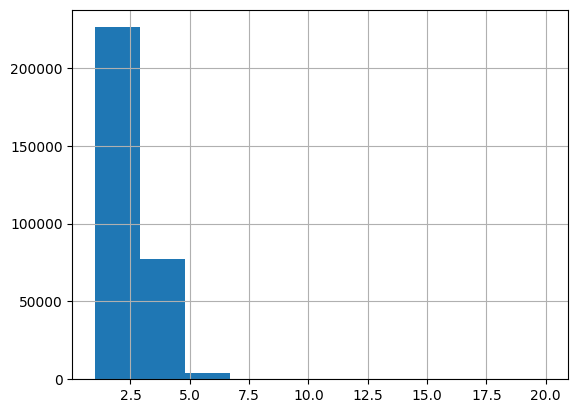

In [93]:
# check distribution

df['CNT_FAM_MEMBERS'].hist()

<Axes: >

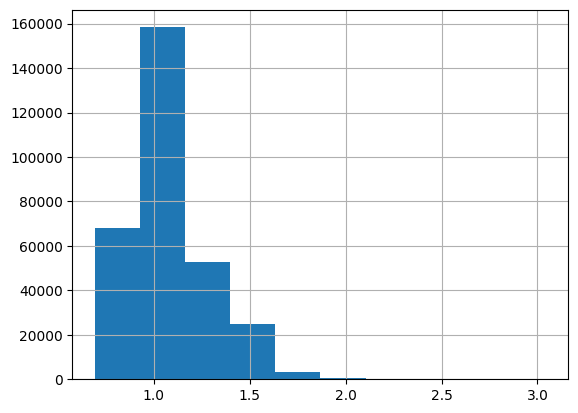

In [95]:
df['CNT_FAM_MEMBERS_log'] = np.log1p(df['CNT_FAM_MEMBERS'])
df['CNT_FAM_MEMBERS_log'].hist()

- impute most frequent
- log transform
- standard scaler

### REGION_RATING_CLIENT

In [96]:
# check value counts

df['REGION_RATING_CLIENT'].value_counts()

REGION_RATING_CLIENT
2    226984
3     48330
1     32197
Name: count, dtype: int64

### REGION_RATING_CLIENT_W_CITY

In [97]:
# check value counts

df['REGION_RATING_CLIENT_W_CITY'].value_counts()

REGION_RATING_CLIENT_W_CITY
2    229484
3     43860
1     34167
Name: count, dtype: int64

- overlaps with REGION_RATING_CLIENT
- drop

### WEEKDAY_APPR_PROCESS_START

In [98]:
# check value counts

df['WEEKDAY_APPR_PROCESS_START'].value_counts()

WEEKDAY_APPR_PROCESS_START
TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: count, dtype: int64

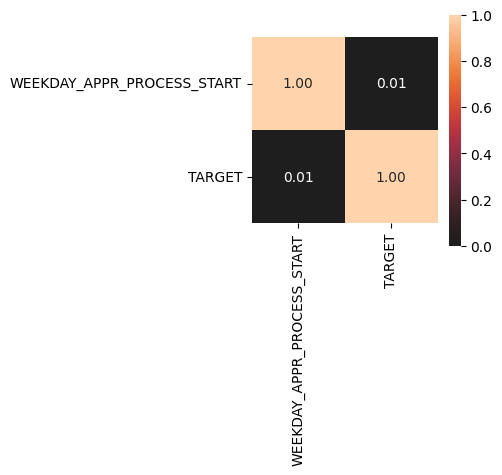

{'corr':                             WEEKDAY_APPR_PROCESS_START    TARGET
 WEEKDAY_APPR_PROCESS_START                    1.000000  0.007074
 TARGET                                        0.007074  1.000000,
 'ax': <Axes: >}

In [102]:
from dython.nominal import associations

associations(df[['WEEKDAY_APPR_PROCESS_START','TARGET']])

- impute with most frequent
- ohe

### HOUR_APPR_PROCESS_START

In [104]:
df['HOUR_APPR_PROCESS_START'].value_counts()

HOUR_APPR_PROCESS_START
10    37722
11    37229
12    34233
13    30959
14    27682
9     27384
15    24839
16    20385
8     15127
17    14900
7      9131
18     9049
6      5842
19     3848
5      3638
4      2090
3      1230
20     1196
21      405
2       305
22      150
1        86
23       41
0        40
Name: count, dtype: int64

<Axes: >

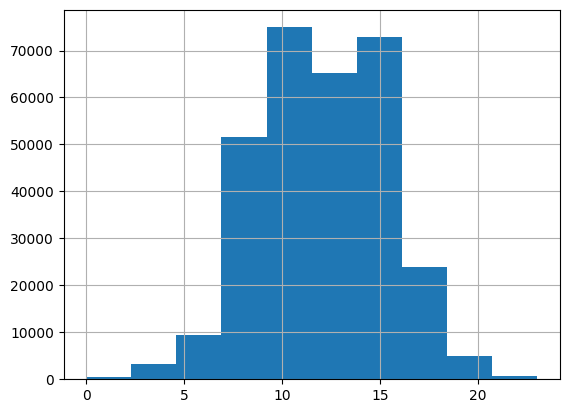

In [105]:
df['HOUR_APPR_PROCESS_START'].hist()

### REG_REGION_NOT_LIVE_REGION

Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)

In [106]:
# check values

df['REG_REGION_NOT_LIVE_REGION'].value_counts()

REG_REGION_NOT_LIVE_REGION
0    302854
1      4657
Name: count, dtype: int64

- impute most frequent

### REG_REGION_NOT_WORK_REGION

In [107]:
# check values

df['REG_REGION_NOT_WORK_REGION'].value_counts()

REG_REGION_NOT_WORK_REGION
0    291899
1     15612
Name: count, dtype: int64

### ORGANIZATION_TYPE

In [111]:
df['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [110]:
df['ORGANIZATION_TYPE'].nunique()

58

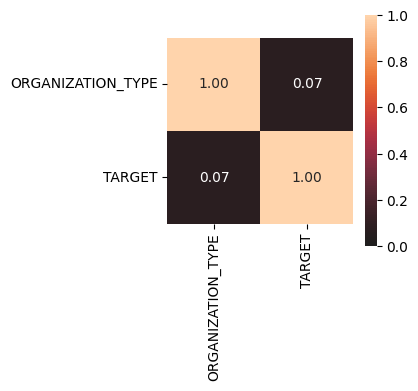

{'corr':                    ORGANIZATION_TYPE   TARGET
 ORGANIZATION_TYPE            1.00000  0.07234
 TARGET                       0.07234  1.00000,
 'ax': <Axes: >}

In [109]:
associations(df[['ORGANIZATION_TYPE','TARGET']])

In [113]:
# check values

df['EXT_SOURCE_2'].value_counts()

EXT_SOURCE_2
0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.004725      1
0.257313      1
0.282030      1
0.181540      1
0.267834      1
Name: count, Length: 119831, dtype: int64